In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv("house_prices_large.csv")

# Ensure correct column names (adjust if dataset differs)
df.rename(columns={'sqft':'Size', 'rooms':'Number of Rooms'}, inplace=True)

# Check data
print(df.head())
print(df.info())
print(df.isnull().sum())

   Size  Location  Number_of_Rooms   Price
0  3774     rural                1  501757
1  1460  suburban                1  249109
2  1894     urban                1  386382
3  1730     urban                3  394863
4  1695     urban                6  414617
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             200 non-null    int64 
 1   Location         200 non-null    object
 2   Number_of_Rooms  200 non-null    int64 
 3   Price            200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None
Size               0
Location           0
Number_of_Rooms    0
Price              0
dtype: int64


In [7]:
# 3. Features and Target
X = df[['Size', 'Location', 'Number_of_Rooms']]
y = df['Price']

# 4. Preprocessing: Scale numeric + Encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Size', 'Number_of_Rooms']),
        ('cat', OneHotEncoder(drop="first"), ['Location'])
    ]
)


In [19]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [11]:
# 7. Model Training
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# 8. Predictions
y_pred = model.predict(X_test_transformed)

# 9. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 22834.413274474042
R² Score: 0.9799204325707883


In [13]:
# 10. Feature Importance (Coefficients)
feature_names = (
    ['Size', 'Number of Rooms'] +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(['Location']))
)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
print(coef_df)

             Feature    Coefficient
0               Size  153805.086830
1    Number of Rooms   19792.202011
2  Location_suburban   81811.400137
3     Location_urban  159948.677539


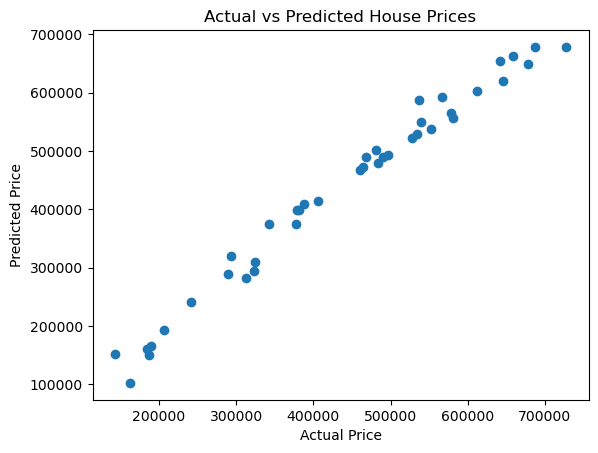

In [15]:
# 11. Visualization: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

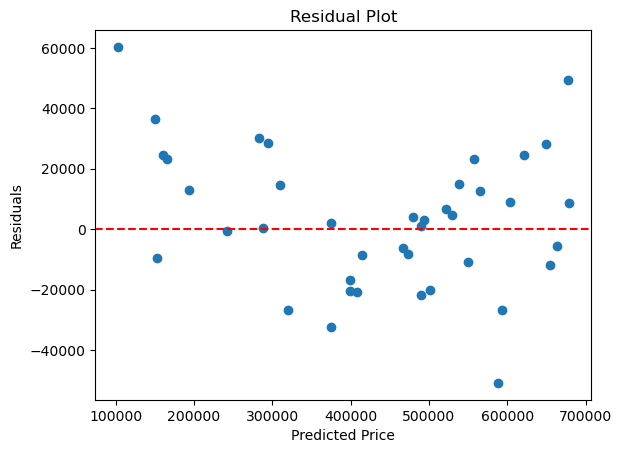

In [17]:
# 12. Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()